In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
h1n1train=pd.read_csv('h1n1train.csv')

In [4]:
h1n1train.shape

(26707, 36)

In [5]:
h1n1test=pd.read_csv('h1n1test.csv')

In [6]:
h1n1test.shape

(26708, 36)

In [7]:
combinedf=pd.concat([h1n1train,h1n1test],axis=0)

In [8]:
combinedf.shape

(53415, 36)

In [9]:
combinedf.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [10]:
combinedf.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [11]:
combinedf.isnull().sum().sort_values(ascending=False)

employment_occupation          26896
employment_industry            26605
health_insurance               24502
income_poverty                  8920
doctor_recc_h1n1                4320
doctor_recc_seasonal            4320
rent_or_own                     4078
employment_status               2934
marital_status                  2850
education                       2814
chronic_med_condition           1903
child_under_6_months            1633
health_worker                   1593
opinion_seas_sick_from_vacc     1058
opinion_seas_risk               1013
opinion_seas_vacc_effective      914
opinion_h1n1_vacc_effective      789
opinion_h1n1_sick_from_vacc      770
opinion_h1n1_risk                768
household_children               474
household_adults                 474
behavioral_avoidance             421
behavioral_touch_face            256
h1n1_knowledge                   238
h1n1_concern                     177
behavioral_outside_home          164
behavioral_large_gatherings      159
b

In [12]:
for col in combinedf.drop('respondent_id',axis=1).columns:
    freq=combinedf[col].value_counts(dropna=False)
    print(freq)

2.0    21318
1.0    16311
3.0     9114
0.0     6495
NaN      177
Name: h1n1_concern, dtype: int64
1.0    29227
2.0    19002
0.0     4948
NaN      238
Name: h1n1_knowledge, dtype: int64
0.0    50642
1.0     2623
NaN      150
Name: behavioral_antiviral_meds, dtype: int64
1.0    38564
0.0    14430
NaN      421
Name: behavioral_avoidance, dtype: int64
0.0    49687
1.0     3690
NaN       38
Name: behavioral_face_mask, dtype: int64
1.0    44045
0.0     9288
NaN       82
Name: behavioral_wash_hands, dtype: int64
0.0    34346
1.0    18910
NaN      159
Name: behavioral_large_gatherings, dtype: int64
0.0    35291
1.0    17960
NaN      164
Name: behavioral_outside_home, dtype: int64
1.0    36175
0.0    16984
NaN      256
Name: behavioral_touch_face, dtype: int64
0.0    38221
1.0    10874
NaN     4320
Name: doctor_recc_h1n1, dtype: int64
0.0    32813
1.0    16282
NaN     4320
Name: doctor_recc_seasonal, dtype: int64
0.0    36978
1.0    14534
NaN     1903
Name: chronic_med_condition, dtype: int64
0

In [13]:
print('employment_occupation-missing %=',(26896/53415)*100)
print('employment_industry-missing%=',(26605/53415)*100)
print('health_insurance-missing%=', (24502/53415)*100)

employment_occupation-missing %= 50.35289712627539
employment_industry-missing%= 49.8081063371712
health_insurance-missing%= 45.871010015913136


In [14]:
combinedf=combinedf.drop(['employment_occupation','employment_industry'],axis=1)

In [15]:
# missing value imputation by Knn-method

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
strngcols=combinedf.drop('respondent_id',axis=1)


In [18]:
strngcols=strngcols.astype(str).apply(lambda X : pd.Series(LabelEncoder().fit_transform(X[X.notnull()]),
                                                           index=X[X.notnull()].index))

In [19]:
from sklearn.impute import KNNImputer

In [20]:
imputer=KNNImputer()

In [21]:
stringcolsimp=imputer.fit_transform(strngcols)

In [22]:
strngcols.isnull().sum().sort_values(ascending=False)

h1n1_concern                   0
opinion_h1n1_sick_from_vacc    0
household_adults               0
census_msa                     0
hhs_geo_region                 0
employment_status              0
rent_or_own                    0
marital_status                 0
income_poverty                 0
sex                            0
race                           0
education                      0
age_group                      0
opinion_seas_sick_from_vacc    0
opinion_seas_risk              0
opinion_seas_vacc_effective    0
opinion_h1n1_risk              0
h1n1_knowledge                 0
opinion_h1n1_vacc_effective    0
health_insurance               0
health_worker                  0
child_under_6_months           0
chronic_med_condition          0
doctor_recc_seasonal           0
doctor_recc_h1n1               0
behavioral_touch_face          0
behavioral_outside_home        0
behavioral_large_gatherings    0
behavioral_wash_hands          0
behavioral_face_mask           0
behavioral

In [23]:
stringcolsimp=pd.DataFrame(stringcolsimp,columns=strngcols.columns)

In [24]:
traindf=stringcolsimp.loc[0:26706]
testdf=stringcolsimp.loc[26707:53415]

In [25]:
print(traindf.shape)
print(testdf.shape)

(26707, 33)
(26708, 33)


In [26]:
labels=pd.read_csv('h1n1labels.csv')

In [27]:
labels.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [28]:
labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [29]:
y_h1n1=labels.h1n1_vaccine
y_seasonal=labels.seasonal_vaccine

In [30]:
X=traindf

In [31]:
##### Logistic regression
from sklearn.linear_model import LogisticRegression


In [32]:
logit=LogisticRegression(max_iter=3000)

In [33]:
logit_h1n1_model=logit.fit(X,y_h1n1)

In [34]:
logit_h1n1_model.score(X,y_h1n1)

0.8260381173475119

In [35]:
X.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3.0,0.0,2.0,1.0,0.0,1.0,8.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,3.0,1.0,0.0,1.0,0.0,0.0,9.0,0.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,0.0,2.0,1.0,1.0,1.0,5.0,1.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0


In [36]:
logit_seasonal_model=logit.fit(X,y_seasonal)

In [37]:
logit_seasonal_model.score(X,y_seasonal)

0.7589021604822705

In [38]:
logregpredict_X_h1n1=logit_h1n1_model.predict(X)
logregpredict_X_seasonal=logit_seasonal_model.predict(X)

In [39]:
pd.crosstab(y_h1n1,logregpredict_X_h1n1)

col_0,0,1
h1n1_vaccine,,
0,12866,8167
1,1855,3819


In [40]:
print((12866+3819)/(12866+8167+1855+3819))

0.6247425768525106


In [41]:
pd.crosstab(y_seasonal,logregpredict_X_seasonal)

col_0,0,1
seasonal_vaccine,,
0,11277,2995
1,3444,8991


In [42]:
print((11277+8991)/(11277+2995+3444+8991))

0.7589021604822705


In [43]:
logregpredict_h1n1_test=logit_h1n1_model.predict_proba(testdf)


In [44]:
logregpredict_h1n1_test[:8]

array([[0.68129865, 0.31870135],
       [0.9080848 , 0.0919152 ],
       [0.27895369, 0.72104631],
       [0.25379721, 0.74620279],
       [0.49028871, 0.50971129],
       [0.07744396, 0.92255604],
       [0.66285774, 0.33714226],
       [0.62976661, 0.37023339]])

In [45]:
logregpredict_seasonal_test=logit_seasonal_model.predict_proba(testdf)

In [46]:
logregpredict_seasonal_test[:8]

array([[0.68129865, 0.31870135],
       [0.9080848 , 0.0919152 ],
       [0.27895369, 0.72104631],
       [0.25379721, 0.74620279],
       [0.49028871, 0.50971129],
       [0.07744396, 0.92255604],
       [0.66285774, 0.33714226],
       [0.62976661, 0.37023339]])

In [47]:
type(logregpredict_h1n1_test)

numpy.ndarray

In [48]:
pd.DataFrame(logregpredict_h1n1_test).to_csv('h1n1_log.csv')

In [49]:
from sklearn.metrics import plot_roc_curve

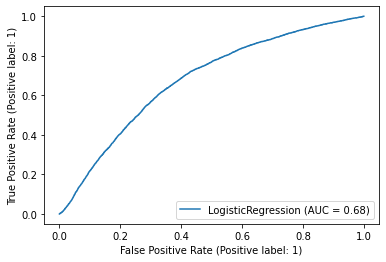

In [50]:
plot_roc_curve(logit_h1n1_model,X,y_h1n1)

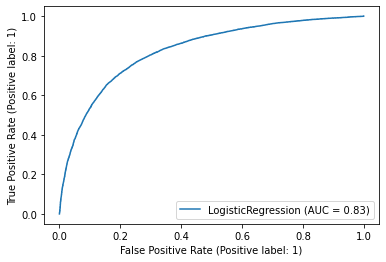

In [51]:
plot_roc_curve(logit_seasonal_model,X,y_seasonal)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_h1n1,logregpredict_X_h1n1))

              precision    recall  f1-score   support

           0       0.87      0.61      0.72     21033
           1       0.32      0.67      0.43      5674

    accuracy                           0.62     26707
   macro avg       0.60      0.64      0.58     26707
weighted avg       0.76      0.62      0.66     26707



In [54]:
print(classification_report(y_seasonal,logregpredict_X_seasonal))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     14272
           1       0.75      0.72      0.74     12435

    accuracy                           0.76     26707
   macro avg       0.76      0.76      0.76     26707
weighted avg       0.76      0.76      0.76     26707



In [55]:
#### logistic score ===== 0.7459 in data driven

In [56]:
#######################################################################################
# Decision tree
from sklearn.tree import DecisionTreeClassifier

In [57]:
tree=DecisionTreeClassifier(max_depth=9,criterion='entropy')

In [58]:
h1n1_treemodel=tree.fit(X,y_h1n1)

In [59]:
h1n1_treemodel.score(X,y_h1n1)

0.8664769536076684

In [60]:
treepredicth1n1=h1n1_treemodel.predict(X)

In [61]:
labels.shape

(26707, 3)

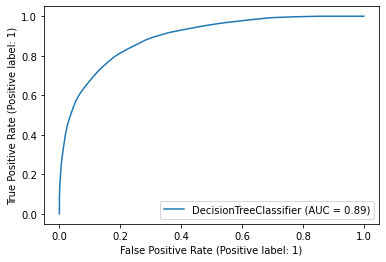

In [62]:
plot_roc_curve(h1n1_treemodel,X,y_h1n1)

In [63]:
print(classification_report(y_h1n1,treepredicth1n1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     21033
           1       0.75      0.56      0.64      5674

    accuracy                           0.87     26707
   macro avg       0.82      0.75      0.78     26707
weighted avg       0.86      0.87      0.86     26707



In [64]:
seasnl_treemodel=tree.fit(X,y_seasonal)

In [65]:
seasnl_treemodel.score(X,y_seasonal)

0.794323585576815

In [66]:
treepredictsseasnl=seasnl_treemodel.predict(X)

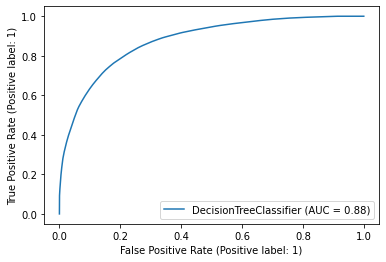

In [67]:
plot_roc_curve(seasnl_treemodel,X,y_seasonal)

In [68]:
print(classification_report(y_seasonal,treepredictsseasnl))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     14272
           1       0.79      0.76      0.78     12435

    accuracy                           0.79     26707
   macro avg       0.79      0.79      0.79     26707
weighted avg       0.79      0.79      0.79     26707



In [69]:
treepredict_h1n1_test=h1n1_treemodel.predict_proba(testdf)

In [70]:
treepredict_seasnl_test=seasnl_treemodel.predict_proba(testdf)

In [71]:
treepredict_h1n1_test[:6]

array([[0.86092715, 0.13907285],
       [0.90635452, 0.09364548],
       [0.19787986, 0.80212014],
       [0.06711409, 0.93288591],
       [0.        , 1.        ],
       [0.05555556, 0.94444444]])

In [72]:
treepredict_seasnl_test[:6]

array([[0.86092715, 0.13907285],
       [0.90635452, 0.09364548],
       [0.19787986, 0.80212014],
       [0.06711409, 0.93288591],
       [0.        , 1.        ],
       [0.05555556, 0.94444444]])

In [73]:
pd.DataFrame(treepredict_h1n1_test).to_csv("h1n1_treesample.csv")

In [74]:
## Decision tree score = 0.7594
#--------------------------------------------------------------------------------------

In [75]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

In [76]:
RF=RandomForestClassifier(n_estimators=1000,oob_score=True)

In [77]:
rfmodel_h1n1=RF.fit(X,y_h1n1)

In [78]:
rfmodel_h1n1.score(X,y_h1n1)

1.0

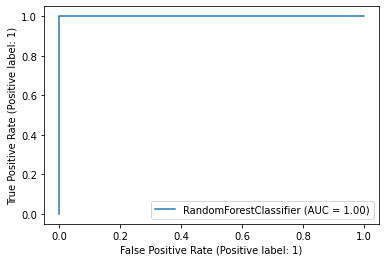

In [79]:
plot_roc_curve(rfmodel_h1n1,X,y_h1n1)

In [80]:
rfprdct_h1n1=rfmodel_h1n1.predict(X)

In [81]:
print(classification_report(y_h1n1,rfprdct_h1n1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21033
           1       1.00      1.00      1.00      5674

    accuracy                           1.00     26707
   macro avg       1.00      1.00      1.00     26707
weighted avg       1.00      1.00      1.00     26707



In [82]:
rfmodel_ssnl=RF.fit(X,y_seasonal)

In [83]:
rfmodel_ssnl.score(X,y_seasonal)

1.0

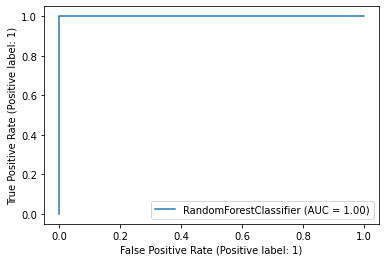

In [84]:
plot_roc_curve(rfmodel_ssnl,X,y_seasonal)

In [85]:
rfprdct_ssnl=rfmodel_ssnl.predict(X)

In [86]:
print(classification_report(y_seasonal,rfprdct_ssnl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14272
           1       1.00      1.00      1.00     12435

    accuracy                           1.00     26707
   macro avg       1.00      1.00      1.00     26707
weighted avg       1.00      1.00      1.00     26707



In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
cross_val_score(rfmodel_h1n1,X,y_h1n1,cv=5)

array([0.85454886, 0.85005616, 0.85452163, 0.85751732, 0.84946639])

In [89]:
cross_val_score(rfmodel_ssnl,X,y_seasonal,cv=5)

array([0.77424186, 0.78210408, 0.77813144, 0.78768021, 0.78243775])

In [90]:
rfpred_test_h1n1=rfmodel_h1n1.predict_proba(testdf)

In [91]:
rfpred_test_h1n1[:6]

array([[0.764, 0.236],
       [0.979, 0.021],
       [0.148, 0.852],
       [0.092, 0.908],
       [0.542, 0.458],
       [0.111, 0.889]])

In [92]:
rfpred_test_ssnl=rfmodel_ssnl.predict_proba(testdf)

In [93]:
rfpred_test_ssnl[:6]

array([[0.764, 0.236],
       [0.979, 0.021],
       [0.148, 0.852],
       [0.092, 0.908],
       [0.542, 0.458],
       [0.111, 0.889]])

In [94]:
pd.DataFrame(rfpred_test_h1n1).to_csv("h1n1_rf_samp.csv")

In [95]:
# Random-forest score : 0.7897
#________________________________________________________________________

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
gb=GradientBoostingClassifier(n_estimators=3000)

In [98]:
gbmodel_h1n1=gb.fit(X,y_h1n1)

In [99]:
gbmodel_h1n1.score(X,y_h1n1)

0.8957202231624668

In [100]:
gbm_pred_h1n1=gbmodel_h1n1.predict(X)

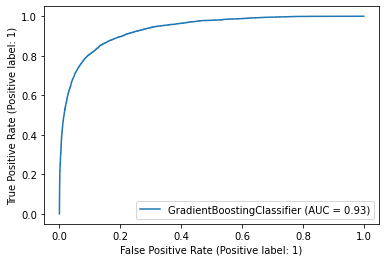

In [101]:
plot_roc_curve(gbmodel_h1n1,X,y_h1n1)

In [102]:
print(classification_report(y_h1n1,gbm_pred_h1n1))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     21033
           1       0.83      0.64      0.72      5674

    accuracy                           0.90     26707
   macro avg       0.87      0.80      0.83     26707
weighted avg       0.89      0.90      0.89     26707



In [103]:
gbmodel_ssnl=gb.fit(X,y_seasonal)

In [104]:
gbmodel_ssnl.score(X,y_seasonal)

0.8398921631033063

In [105]:
gbm_pred_ssnl=gb.predict(X)

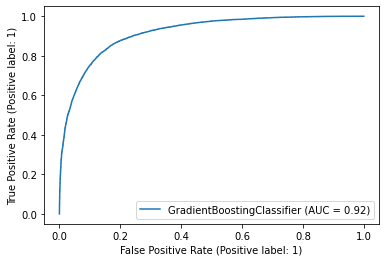

In [106]:
plot_roc_curve(gbmodel_ssnl,X,y_seasonal)

In [107]:
print(classification_report(y_seasonal,gbm_pred_ssnl))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     14272
           1       0.84      0.82      0.83     12435

    accuracy                           0.84     26707
   macro avg       0.84      0.84      0.84     26707
weighted avg       0.84      0.84      0.84     26707



In [108]:
cross_val_score(gbmodel_h1n1,X,y_h1n1,cv=4)

array([0.84813539, 0.84933353, 0.8494833 , 0.84152187])

In [109]:
gbm_pred_test_h1n1=gb.predict_proba(testdf)

In [110]:
gbm_pred_test_ssnl=gb.predict_proba(testdf)

In [111]:
gbm_pred_test_h1n1[:6]

array([[0.83734706, 0.16265294],
       [0.97446279, 0.02553721],
       [0.15693552, 0.84306448],
       [0.0787391 , 0.9212609 ],
       [0.62531309, 0.37468691],
       [0.0202475 , 0.9797525 ]])

In [112]:
gbm_pred_test_ssnl[:6]

array([[0.83734706, 0.16265294],
       [0.97446279, 0.02553721],
       [0.15693552, 0.84306448],
       [0.0787391 , 0.9212609 ],
       [0.62531309, 0.37468691],
       [0.0202475 , 0.9797525 ]])

In [113]:
pd.DataFrame(gbm_pred_test_h1n1).to_csv("h1n1_gbm_samp.csv")

In [114]:
#------------------------------------------------------------------
# svm
from sklearn.svm import SVC

In [115]:
svm=SVC()

In [116]:
svm_model_h1n1=svm.fit(X,y_h1n1)

In [117]:
svm_model_h1n1.score(X,y_h1n1)

0.8520238139813532

In [118]:
svm_pred_h1n1=svm.predict(X)

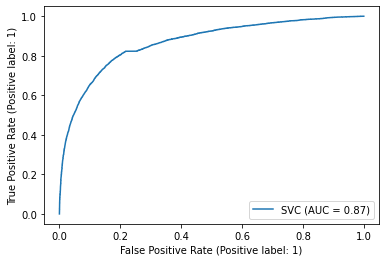

In [119]:
plot_roc_curve(svm_model_h1n1,X,y_h1n1)

In [120]:
print(classification_report(y_h1n1,svm_pred_h1n1))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     21033
           1       0.81      0.40      0.53      5674

    accuracy                           0.85     26707
   macro avg       0.83      0.69      0.72     26707
weighted avg       0.85      0.85      0.83     26707



In [121]:
svm_model_ssnl=svm.fit(X,y_seasonal)

In [122]:
svm_model_ssnl.score(X,y_seasonal)

0.7904294754184297

In [123]:
svm_pred_ssnl=svm_model_ssnl.predict(X)

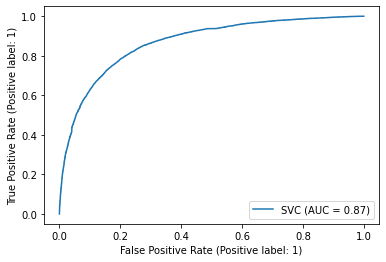

In [124]:
plot_roc_curve(svm_model_ssnl,X,y_seasonal)

In [125]:
print(classification_report(y_seasonal,svm_pred_ssnl))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81     14272
           1       0.79      0.74      0.77     12435

    accuracy                           0.79     26707
   macro avg       0.79      0.79      0.79     26707
weighted avg       0.79      0.79      0.79     26707



In [126]:
svm_pred_test_h1n1=svm_model_h1n1.predict(testdf)